In [302]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use('ggplot')

In [303]:
train = pd.read_csv('train-file.csv')
test = pd.read_csv('test-file.csv')
sample_submission = pd.read_csv('sample-submission.csv')

1. employee_id - Unique ID for employee
2. department - Department of employee
3. region - Region of employment (unordered)
4. education - Education Level
5. gender - Gender of Employee
6. recruitment_channel - Channel of recruitment for employee
7. no_of_trainings - no of other trainings completed in previous year on soft skills, technical skills etc.
8. age - Age of Employee
9. previous_year_rating - Employee Rating for the previous year
10. length_of_service - Length of service in years
11. KPIs_met >80% - if Percent of KPIs(Key performance Indicators) >80% then 1 else 0
12. awards_won? - if awards won during previous year then 1 else 0
13. avg_training_score - Average score in current training evaluations
14. is_promoted - (Target) Recommended for promotion

In [304]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [305]:
print('Train data')
print('Amount of rows: {}; Amount of columns: {}\n'.format(train.shape[0], train.shape[1]))
print('Test data')
print('Amount of rows: {}; Amount of columns: {}'.format(test.shape[0], test.shape[1]))

Train data
Amount of rows: 54808; Amount of columns: 14

Test data
Amount of rows: 23490; Amount of columns: 13


In [306]:
# Amount of missing values
train.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [307]:
test.isnull().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [308]:
# Fill missing values
cols_with_missing_vals = ['education', 'previous_year_rating']
for col in cols_with_missing_vals:
    train[col].fillna(train[col].value_counts().reset_index().iloc[0, 0], inplace=True)
    test[col].fillna(train[col].value_counts().reset_index().iloc[0, 0], inplace=True)

### Exploratory data analysis

In [309]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             54808 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  54808 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [310]:
train.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.304481,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.214770,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


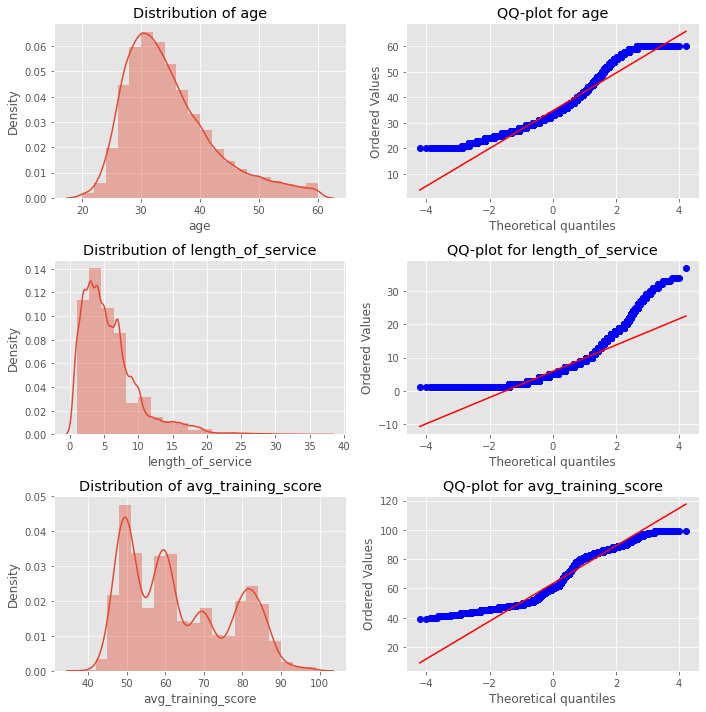

In [311]:
# Shape of distribution 'age'
from scipy.stats import probplot
contin_cols = ['age', 'length_of_service', 'avg_training_score']
fig, axs = plt.subplots(3, 2, figsize=(10, 10))
for i in range(len(axs)):
    for j in range(2):
        ax = axs[i][j]
        if j < 1:
            sns.distplot(train[contin_cols[i]], bins=20, ax=ax)
            ax.set_title('Distribution of {}'.format(contin_cols[i]))
        else:
            probplot(train[contin_cols[i]], plot=ax)
            ax.set_title('QQ-plot for {}'.format(contin_cols[i]))
fig.tight_layout()
plt.show()

In [312]:
def create_barplot(figsize=(10, 6), x=None, y=None, palette='Blues', hue=None, xlabel=None, ylabel=None, title=None, axhline=None, xtick_rot=None):
    plt.figure(figsize=figsize)
    sns.barplot(x=x, y=y, hue=hue, palette=palette)
    plt.xlabel(xlabel, size=14)
    plt.ylabel(ylabel, size=14)
    plt.title(title, size=16)
    if axhline != None:
        plt.axhline(axhline, linestyle='--', color='navy')
    plt.xticks(rotation=xtick_rot)
    plt.show()

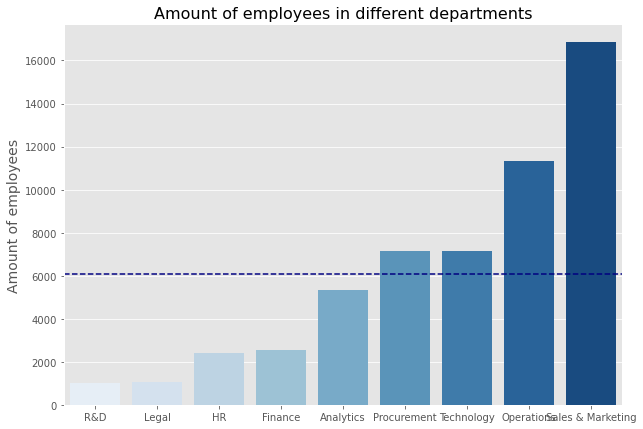

In [313]:
data1 = train.groupby('department', as_index=False).agg({'employee_id': 'count'}).sort_values('employee_id')
create_barplot(figsize=(10, 7), x=data1['department'], y=data1['employee_id'], xlabel='', ylabel='Amount of employees',
               title='Amount of employees in different departments', axhline=data1['employee_id'].mean())

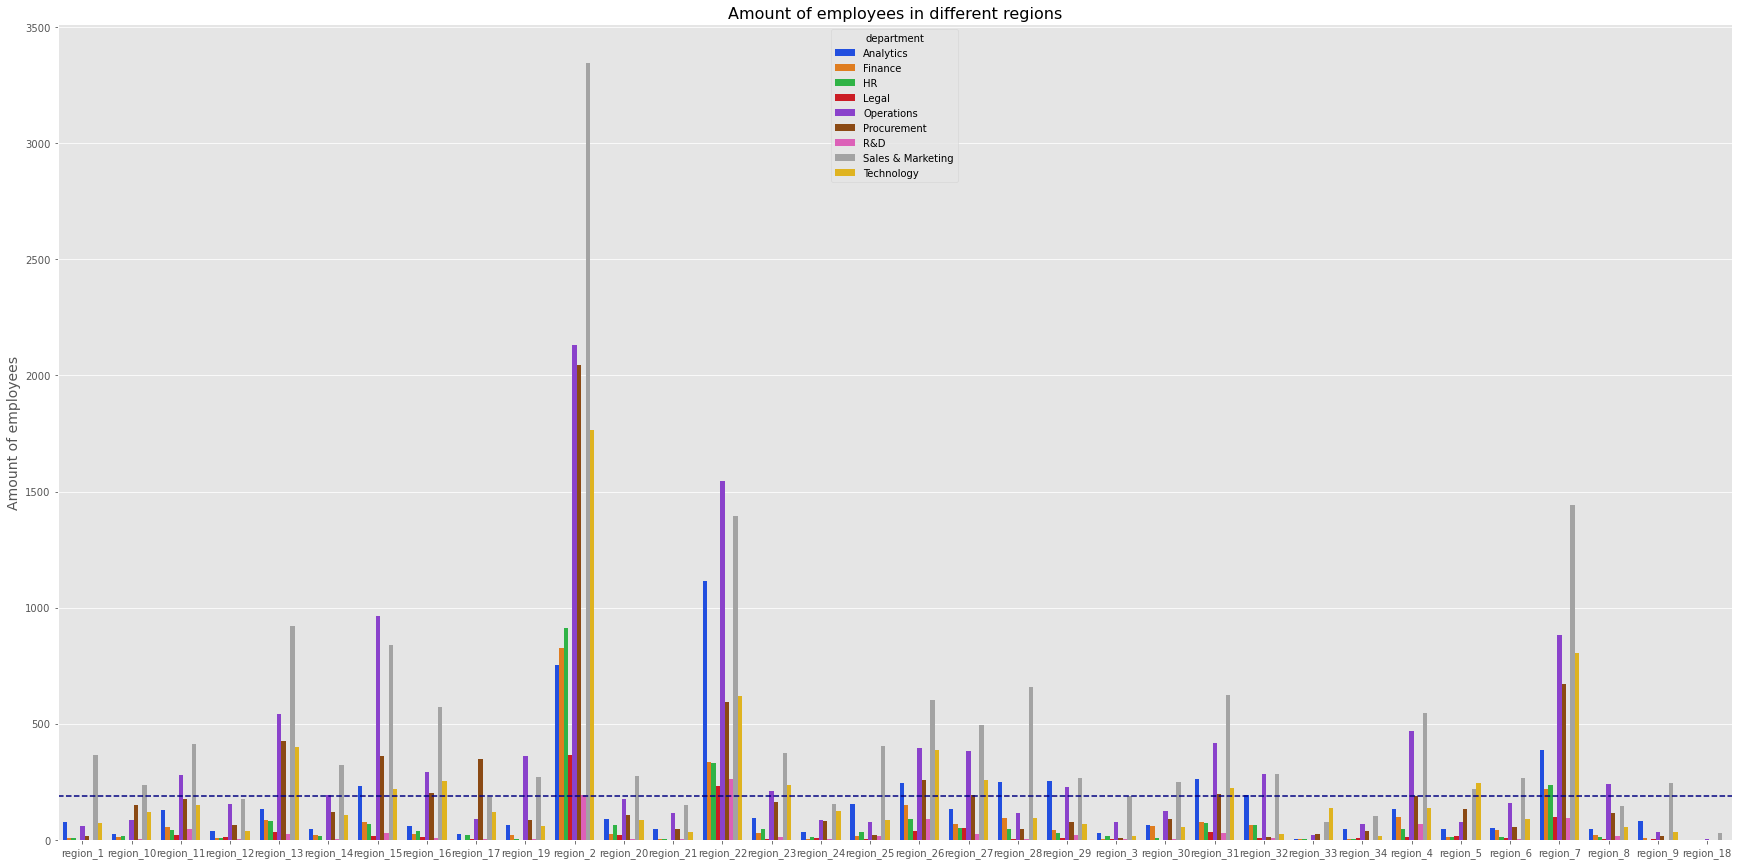

In [314]:
data2 = train.groupby(['department', 'region'], as_index=False).agg({'employee_id': 'count'})
create_barplot(figsize=(30, 15), x=data2['region'], y=data2['employee_id'], palette='bright', hue=data2['department'], xlabel='',
               ylabel='Amount of employees', title='Amount of employees in different regions', axhline=data2['employee_id'].mean())

In [315]:
data3 = train.groupby('education', as_index=False).agg({'employee_id': 'count'}).sort_values('employee_id')
data3.head()

,education,employee_id
1,Below Secondary,805
2,Master's & above,14925
0,Bachelor's,39078


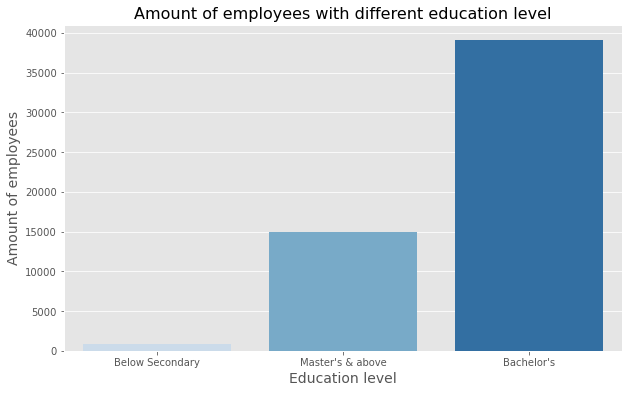

In [316]:
create_barplot(x=data3['education'], y=data3['employee_id'], xlabel='Education level',
               ylabel='Amount of employees', title='Amount of employees with different education level')

In [317]:
data4 = train.groupby(['education', 'gender'], as_index=False).agg({'employee_id': 'count'}).sort_values(['employee_id', 'education'])
data4

,education,gender,employee_id
2,Below Secondary,f,289
3,Below Secondary,m,516
4,Master's & above,f,4778
5,Master's & above,m,10147
0,Bachelor's,f,11245
1,Bachelor's,m,27833


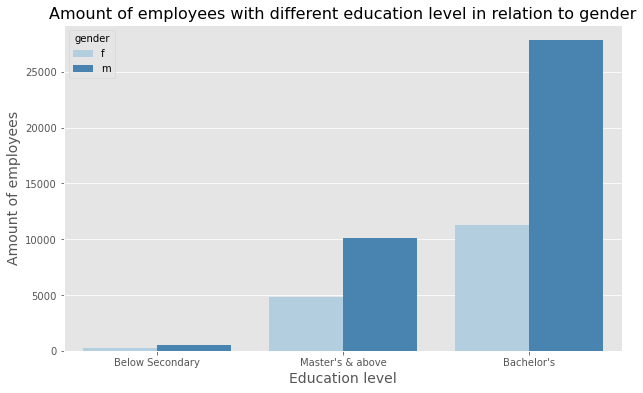

In [318]:
create_barplot(x=data4['education'], y=data4['employee_id'], hue=data4['gender'],
               xlabel='Education level', ylabel='Amount of employees',
               title='Amount of employees with different education level in relation to gender')

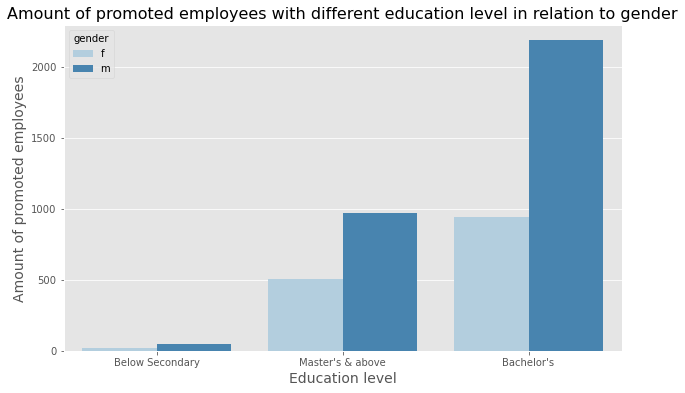

In [319]:
data5 = train.groupby(['education', 'gender'], as_index=False).agg({'is_promoted': 'sum'}).sort_values(['is_promoted', 'education'])
create_barplot(x=data5['education'], y=data5['is_promoted'], hue=data5['gender'],
               xlabel='Education level', ylabel='Amount of promoted employees',
               title='Amount of promoted employees with different education level in relation to gender')

In [320]:
data6 = train.groupby('is_promoted', as_index=False).agg({'age': 'mean',
                                                          'previous_year_rating': 'mean',
                                                          'length_of_service': 'mean',
                                                          'KPIs_met >80%': 'sum',
                                                          'awards_won?': 'sum',
                                                          'avg_training_score': 'mean'})
data6

,is_promoted,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,0,34.844037,3.247686,5.879398,16029,711,62.647686
1,1,34.372965,3.914524,5.716367,3262,559,71.325193


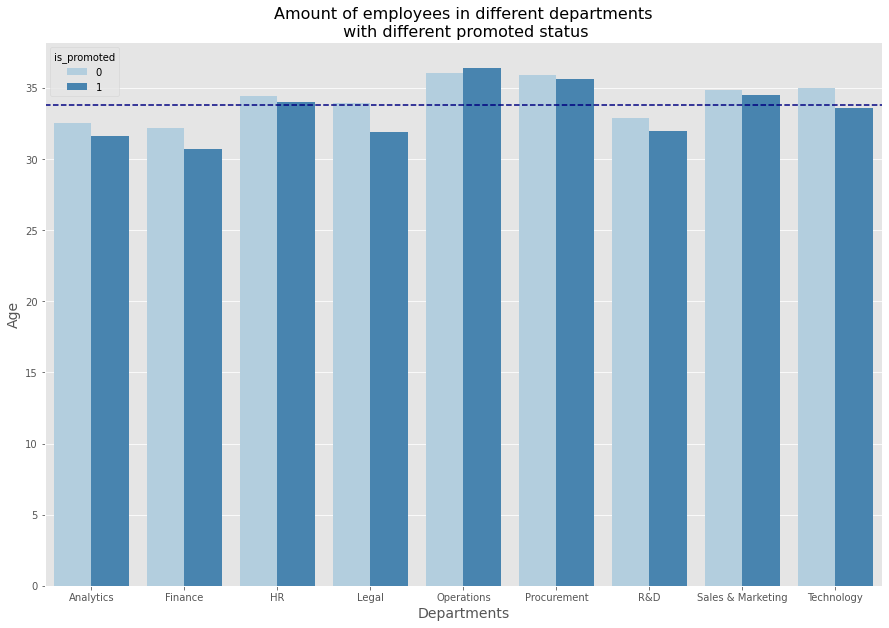

In [321]:
# Research data with employee's status - 'is promoted' and 'isn't promoted'
data7 = train.groupby(['department', 'is_promoted'], as_index=False).agg({'age': 'mean'})
create_barplot(figsize=(15, 10), x=data7['department'], y=data7['age'], hue=data7['is_promoted'],
               xlabel='Departments', ylabel='Age', title='Amount of employees in different departments\n with different promoted status',
               axhline=data7['age'].mean())

In [322]:
data8 = train.groupby(['education', 'is_promoted'], as_index=False).agg({'age': 'mean'})
data8.head()

,education,is_promoted,age
0,Bachelor's,0,33.363998
1,Bachelor's,1,32.472204
2,Below Secondary,0,23.840108
3,Below Secondary,1,23.791045
4,Master's & above,0,39.402185


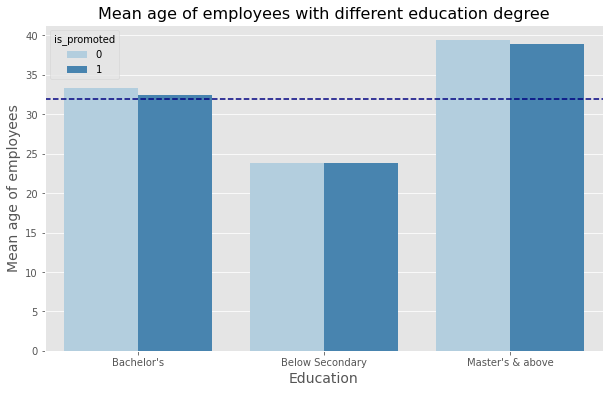

In [323]:
create_barplot(x=data8['education'], y=data8['age'], hue=data8['is_promoted'], xlabel='Education',
               ylabel='Mean age of employees', title='Mean age of employees with different education degree',
               axhline=data8['age'].mean())

In [324]:
train['young_old_employee'] = train['age'].apply(lambda x: 1 if x > train['age'].mean() else 0)
test['young_old_employee'] = test['age'].apply(lambda x: 1 if x > train['age'].mean() else 0)

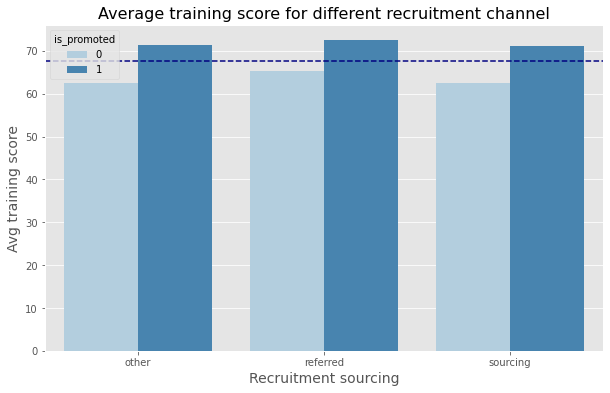

In [325]:
data9 = train.groupby(['recruitment_channel', 'is_promoted'], as_index=False).agg({'avg_training_score': 'mean'})
create_barplot(x=data9['recruitment_channel'], y=data9['avg_training_score'], hue=data9['is_promoted'],
               xlabel='Recruitment sourcing', ylabel='Avg training score', title='Average training score for different recruitment channel',
               axhline=data9['avg_training_score'].mean())

In [326]:
# Add feature with high and low avg_training_score
train['high_low_train_score'] = train['avg_training_score'].apply(lambda x: 1 if x > train['avg_training_score'].mean() else 0)
test['high_low_train_score'] = test['avg_training_score'].apply(lambda x: 1 if x > train['avg_training_score'].mean() else 0)

In [327]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,young_old_employee,high_low_train_score
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0,1,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0,0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0,0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0,1,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0,1,1


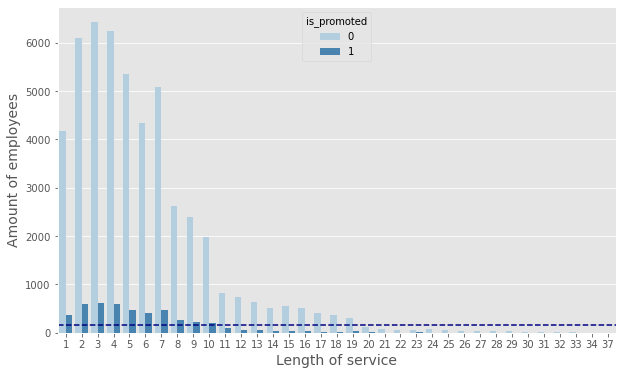

In [328]:
data10 = train.groupby(['length_of_service', 'is_promoted'], as_index=False).agg({'employee_id': 'count'})
create_barplot(x=data10['length_of_service'], y=data10['employee_id'], hue=data10['is_promoted'], xlabel='Length of service',
               ylabel='Amount of employees', axhline=data10[data10['is_promoted'] == 1]['employee_id'].mean())

In [329]:
train['small_length_of_service'] = train['length_of_service'].apply(lambda x: 1 if x <= 10 else 0)
test['small_length_of_service'] = test['length_of_service'].apply(lambda x: 1 if x <= 10 else 0)

In [330]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,young_old_employee,high_low_train_score,small_length_of_service
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0,1,0,1
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0,0,0,1
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0,0,0,1
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0,1,0,1
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0,1,1,1


In [331]:
# Coding categorical features
cols_type = train.dtypes.reset_index().rename(columns={'index': 'columns',
                                           0: 'type_of_column'})
obj_cols = list(cols_type[cols_type['type_of_column'] == 'object']['columns'])
obj_cols

['department', 'region', 'education', 'gender', 'recruitment_channel']

In [332]:
X = train.drop(columns='is_promoted')
y = train['is_promoted']

In [333]:
print('Test shape:', test.shape)
print('X shape:', X.shape)
print('Y shape:', y.shape)

Test shape: (23490, 16)
X shape: (54808, 16)
Y shape: (54808,)


In [334]:
full_df = pd.concat([X, test])

In [335]:
print('full_df shape:', full_df.shape)

full_df shape: (78298, 16)


In [336]:
full_df = pd.get_dummies(full_df)

In [337]:
full_df.dtypes

employee_id                       int64
no_of_trainings                   int64
age                               int64
previous_year_rating            float64
length_of_service                 int64
                                 ...   
gender_f                          uint8
gender_m                          uint8
recruitment_channel_other         uint8
recruitment_channel_referred      uint8
recruitment_channel_sourcing      uint8
Length: 62, dtype: object

In [338]:
X = full_df.iloc[:54808, :]
test_X = full_df.iloc[54808:, :]

In [339]:
print('Test shape:', test_X.shape)
print('X shape:', X.shape)
print('Y shape:', y.shape)

Test shape: (23490, 62)
X shape: (54808, 62)
Y shape: (54808,)


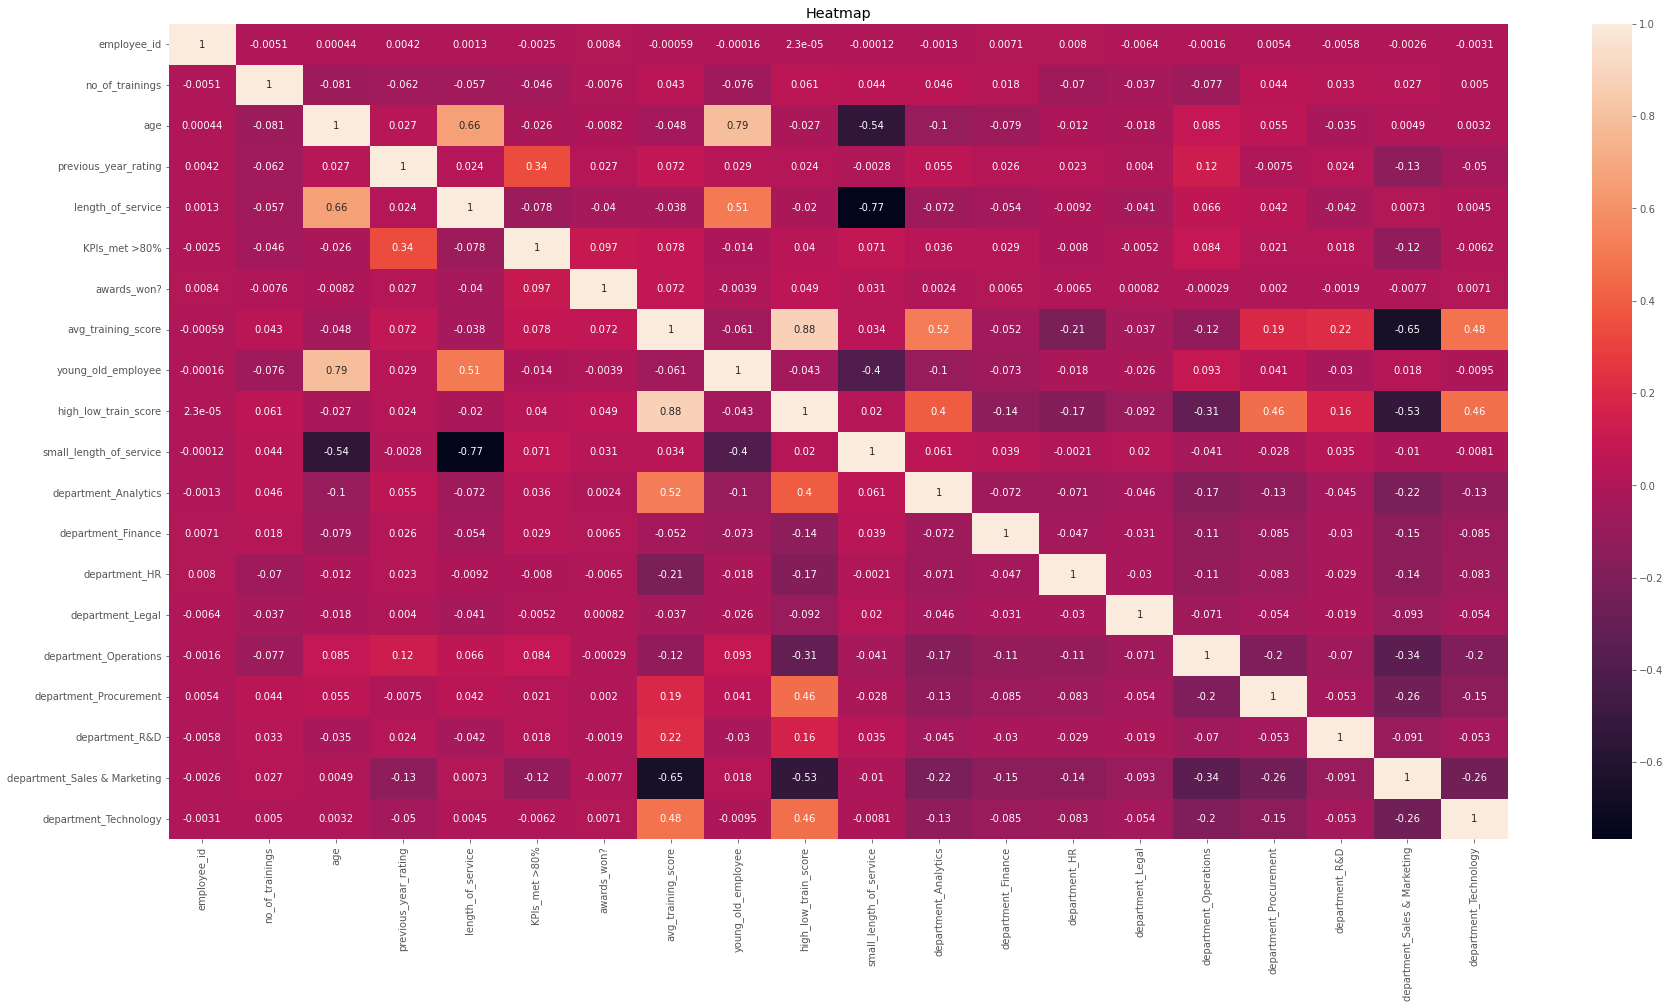

In [340]:
# Create correlation matrix
corr_mat = X.iloc[:, :20].corr()
plt.figure(figsize=(30, 15))
sns.heatmap(corr_mat, annot=True)
plt.title('Heatmap')
plt.show()

### Create model

In [341]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

In [342]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import f1_score

In [343]:
rfc = RandomForestClassifier(random_state=1, n_estimators=80, criterion='gini')
etc = ExtraTreesClassifier(random_state=1, n_estimators=80, criterion='gini')
gbc = GradientBoostingClassifier(random_state=1, learning_rate=0.1, n_estimators=80)
xgb = XGBClassifier(random_state=1, n_estimators=100, learning_rate=0.1, booster='gbtree')
lgbm = LGBMClassifier(random_state=1, boosting_type='gbdt', num_leaves=31, learning_rate=0.1, n_estimators=100)
model_list = [rfc, etc, gbc, xgb, lgbm]

In [63]:
trained_models = []
for i in range(len(model_list)):
    print('{}. {}:'.format(i+1, model_list[i]))
    model = model_list[i].fit(X_train, y_train)
    trained_models.append(model)
    prediction = model.predict(X_test)
    metric = f1_score(y_test, prediction)
    print('F1 score ({}) = {}\n'.format(model_list[i], metric))

1. RandomForestClassifier(n_estimators=80, random_state=1):
F1 score (RandomForestClassifier(n_estimators=80, random_state=1)) = 0.4933469805527124

2. ExtraTreesClassifier(n_estimators=80, random_state=1):
F1 score (ExtraTreesClassifier(n_estimators=80, random_state=1)) = 0.43020367610531546

3. GradientBoostingClassifier(n_estimators=80, random_state=1):
F1 score (GradientBoostingClassifier(n_estimators=80, random_state=1)) = 0.49786780383795315

4. XGBClassifier(base_score=None, booster='gbtree', colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=False, gamma=None, gpu_id=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=1, reg_alpha=None, re

In [376]:
# Tune the model
lgbm = LGBMClassifier(random_state=1, boosting_type='gbdt', num_leaves=21, learning_rate=0.3, n_estimators=50)
lgbm.fit(X_train, y_train)

LGBMClassifier(learning_rate=0.3, n_estimators=50, num_leaves=21,
               random_state=1)

In [377]:
lgbm_pred = lgbm.predict(X_test)
metric_lgbm = f1_score(y_test, lgbm_pred)
print('F1 score(LGBM) =', metric_lgbm)

F1 score(LGBM) = 0.52880658436214


### Create submission

In [378]:
lgbm.fit(X, y)
result = lgbm.predict(test_X)

In [379]:
sample_submission.head()

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0


In [380]:
data = {
    'employee_id': test['employee_id'],
    'is_promoted': result
}

In [381]:
result_df = pd.DataFrame(data)

In [383]:
result_df.to_csv('my_submission.csv', index=False)